# Plotting Aviation Accident Rates Over Time

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv('../data/t-100/t-100_departures.csv')

In [16]:
data.tail()

,Date,Departures
297,24-Oct,769810
298,24-Nov,722680
299,24-Dec,742477
300,25-Jan,680523
301,25-Feb,645183


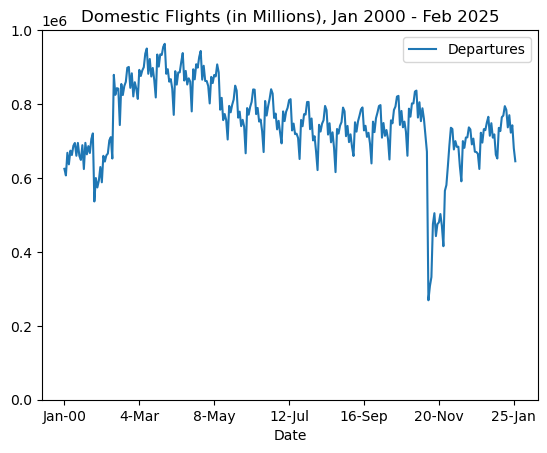

In [32]:
plot = data.plot('Date','Departures')
plt.title("Domestic Flights (in Millions), Jan 2000 - Feb 2025")
plt.ylim(0,1000000)
plt.show()